# Treinamento e Classificação dos Dados

Esse notebook visa o preparativo para o treinamento e classificação dos dados rotulados.

### Métricas Consideradas:
- hash (identificador do contêiner)
- Consumo de CPU (Valores de pico e tendência central)
- Consumo de Memória (Valores de pico e tendência central)
- Flavor (rótulo)





In [1]:
import pandas as pd
import hashlib
import glob
import os

## Carga do Arquivo de Dados

In [2]:
path_projeto = '/home/56740050368/Treinamento/IA-PUC_Minas/Trabalho_Cientifico'
path_dados = '/dados/metrics/cpu_memoria_rotulado.csv'
csv_file = path_projeto+path_dados
data = pd.read_csv(csv_file)        
data

,hash,mediana_cpu,pico_cpu,mediana_memoria,pico_memoria,flavor
0,0008019539e8167e69236ac2ea9ae47e,0.911453,3.650762,1.878906,2.648438,f3
1,00192f6f6f4e5a93d8d562202c6d0227,0.926145,1.039340,485.292969,485.429688,f9
2,0037ae84e6ff5ab17ac50cb82c22dc97,1.068787,5.453807,284.394531,293.792969,f5
3,00397e755d86f88d58f23419ce8ba8e8,0.001378,0.002551,11.078125,11.082031,f0
4,003c3255c6f292d40085b45189c83b23,0.117761,0.170372,241.957031,241.972656,f4
...,...,...,...,...,...,...
7087,ffbff6083eb234b26af881f5adbde374,1.158042,1.224056,331.925781,331.925781,f6
7088,ffc59295b896b7b22280d0bf1be0699d,0.054904,0.106984,32.525391,32.824219,f0
7089,ffd57b1dd0bbae7965fe5dadb86232d3,1.581423,1.964469,49.019531,51.496094,f1
7090,ffe0c98ba8be743bf086d4e7af181823,0.717605,0.913246,101.005859,105.875000,f2


## Seleção das colunas de interesse para treinameto

- mediana_cpu
- pico_cpu
- mediana_memoria
- pico_memoria
- flavor 

In [3]:
# Processamento de dados de memória
amostra = data[['hash', 'mediana_cpu', 'pico_cpu', 'mediana_memoria', 'pico_memoria', 'flavor']]
amostra

,hash,mediana_cpu,pico_cpu,mediana_memoria,pico_memoria,flavor
0,0008019539e8167e69236ac2ea9ae47e,0.911453,3.650762,1.878906,2.648438,f3
1,00192f6f6f4e5a93d8d562202c6d0227,0.926145,1.039340,485.292969,485.429688,f9
2,0037ae84e6ff5ab17ac50cb82c22dc97,1.068787,5.453807,284.394531,293.792969,f5
3,00397e755d86f88d58f23419ce8ba8e8,0.001378,0.002551,11.078125,11.082031,f0
4,003c3255c6f292d40085b45189c83b23,0.117761,0.170372,241.957031,241.972656,f4
...,...,...,...,...,...,...
7087,ffbff6083eb234b26af881f5adbde374,1.158042,1.224056,331.925781,331.925781,f6
7088,ffc59295b896b7b22280d0bf1be0699d,0.054904,0.106984,32.525391,32.824219,f0
7089,ffd57b1dd0bbae7965fe5dadb86232d3,1.581423,1.964469,49.019531,51.496094,f1
7090,ffe0c98ba8be743bf086d4e7af181823,0.717605,0.913246,101.005859,105.875000,f2


<AxesSubplot:ylabel='Frequency'>

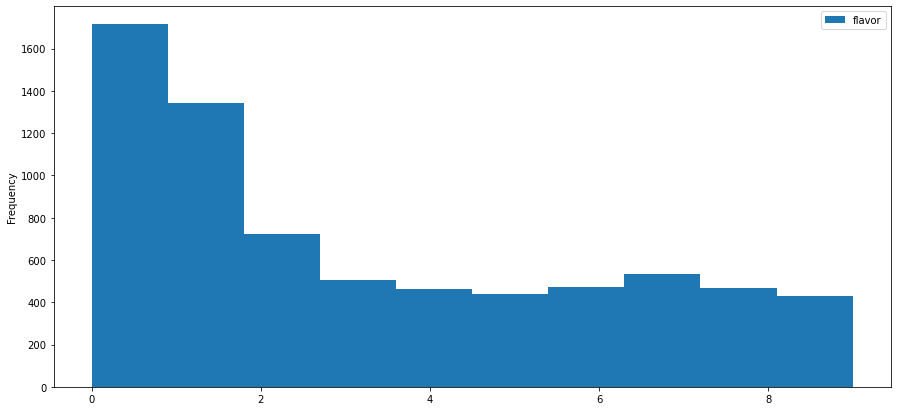

In [4]:
amostra_flavor = amostra[['flavor']]
amostra_flavor = amostra_flavor.rename(columns={'flavor':'id'})
amostra_flavor['flavor'] = amostra_flavor['id'].apply(lambda x: int(x[1:2]))
amostra_flavor.plot.hist(column=["flavor"], figsize=(15,7))

## Seleção de amostra para treinamento e teste

A divisão do dataset considerou a estratificação dos dados mantendo a mesma proporção da quantidade de itens com relação ao rótulo.

- https://medium.com/turing-talks/turing-talks-17-modelos-de-predi%C3%A7%C3%A3o-decision-tree-610aa484cb05
- https://www.geeksforgeeks.org/stratified-sampling-in-pandas/

In [32]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [33]:
# Estratificação da amostra para treinamento e testes
# Considera uma seleção aleatória de 80% da amostra para treino e 20% para testes
# A seleção amostral é proporcional ao tipo de flavor mantendo a mesma proporção encontrada na amostra.
# Usa a técnica de estratificação
perc_train = 0.7 # Percentual de amostras para treinamento
amostra_train = amostra.groupby('flavor', group_keys=False).apply(lambda x: x.sample(frac=perc_train))
amostra_train

,hash,mediana_cpu,pico_cpu,mediana_memoria,pico_memoria,flavor
1422,3308b73f09b659d0f86d6c58e63c9276,0.000407,0.000698,10.992188,10.992188,f0
375,0e2014ebb415c0da35552e8831277cba,0.068928,0.250325,1.734375,1.804688,f0
3580,7f46f73faa82cc86f6081c49a4440bc6,0.016945,0.047580,48.914062,48.914062,f0
6558,ecebef1ffe3580172c6a154c77b7557f,0.196852,0.230553,9.562500,9.566406,f0
1093,271ff3ad158ff9379ba6b185e7786169,0.265451,0.319213,20.585938,20.996094,f0
...,...,...,...,...,...,...
1368,30c2bee9fd088e0c4ed456c1cbd2f798,0.636981,0.958309,451.878906,452.355469,f9
509,129fda4d934add0f2ba726aa9a7189b6,1.394016,7.492483,437.566406,451.164062,f9
2407,5634fb5b8afa542293bb4a23fea2eb62,9.250063,9.797978,155.113281,155.238281,f9
5994,d8bb27a14ed35e0f57251ccb1e71b373,1.204670,1.561617,450.656250,450.710938,f9


In [34]:
# X_test é o complemento entre a amostra e X_train     
amostra_test  = pd.merge(amostra, amostra_train, how='outer',on=['hash', 'hash'])
amostra_test = amostra_test[amostra_test.isnull().any(axis=1)]
amostra_test = amostra_test[['hash', 'mediana_cpu_x', 'pico_cpu_x', 'mediana_memoria_x', 
'pico_memoria_x', 'flavor_x']]
# Renomeia as colunas
amostra_test.rename(columns={"mediana_cpu_x": "mediana_cpu", "pico_cpu_x": "pico_cpu", 
"mediana_memoria_x":"mediana_memoria", "pico_memoria_x": "pico_memoria", "flavor_x": "flavor"}, 
inplace=True)
amostra_test

,hash,mediana_cpu,pico_cpu,mediana_memoria,pico_memoria,flavor
5,004156954736d58869a3a2e1d5e197e8,5.736443,6.796233,347.240234,347.589844,f6
9,005d2c19a39bb668f1d131745c898c6d,2.678451,3.258090,46.828125,46.843750,f3
10,0066c35252c12588ffbc2882cda6f3c0,0.009975,0.086630,3.097656,3.097656,f0
16,00767e02fd390ca1c2c8bf53c1e96bf2,5.590001,6.272925,502.968750,506.242188,f10
26,00f584a7d1cb7230fe9a0e088258b8d8,3.518807,9.105625,65.759766,66.808594,f8
...,...,...,...,...,...,...
7086,ffbd826c23054fa5c44ffb0e3f96c17e,7.954098,8.404605,463.500000,463.503906,f9
7087,ffbff6083eb234b26af881f5adbde374,1.158042,1.224056,331.925781,331.925781,f6
7088,ffc59295b896b7b22280d0bf1be0699d,0.054904,0.106984,32.525391,32.824219,f0
7089,ffd57b1dd0bbae7965fe5dadb86232d3,1.581423,1.964469,49.019531,51.496094,f1


## Separação dos Conjuntos de Treino e Testes

In [35]:
## Conjunto de Treino
y_train = amostra_train[['flavor']]
y_train.head()

,flavor
1422,f0
375,f0
3580,f0
6558,f0
1093,f0


In [36]:
X_train = amostra_train[['mediana_cpu', 'pico_cpu', 'mediana_memoria', 'pico_memoria']]
X_train.head()

,mediana_cpu,pico_cpu,mediana_memoria,pico_memoria
1422,0.000407,0.000698,10.992188,10.992188
375,0.068928,0.250325,1.734375,1.804688
3580,0.016945,0.047580,48.914062,48.914062
6558,0.196852,0.230553,9.562500,9.566406
1093,0.265451,0.319213,20.585938,20.996094


In [37]:
# Conjuntos de Teste
y_test = amostra_test[['flavor']]
y_test.head(10)

,flavor
5,f6
9,f3
10,f0
16,f10
26,f8
27,f2
28,f0
33,f5
39,f5
46,f0


In [38]:
X_test = amostra_test[['mediana_cpu', 'pico_cpu', 'mediana_memoria', 'pico_memoria']]
X_test.head()

,mediana_cpu,pico_cpu,mediana_memoria,pico_memoria
5,5.736443,6.796233,347.240234,347.589844
9,2.678451,3.258090,46.828125,46.843750
10,0.009975,0.086630,3.097656,3.097656
16,5.590001,6.272925,502.968750,506.242188
26,3.518807,9.105625,65.759766,66.808594


# Árvore de decisão

## Critério Entropy

In [39]:
# Critério de Entropia
#clf_entropy = tree.DecisionTreeClassifier(criterion="entropy")
clf_entropy = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, 
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [40]:
# Treinamento
tree = clf_entropy.fit(X_train, y_train)

In [41]:
# Funções Auxiliares
# Predict
def predict(model, exemplar):
    del exemplar['hash']
    del exemplar['flavor']    
    print(f'Predicao para os parâmetros [{exemplar}] => flavor {model.predict(exemplar)[0]}')

# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))

In [42]:
## Predições baseadas no conjunto de Teste
amostra_test.head()

,hash,mediana_cpu,pico_cpu,mediana_memoria,pico_memoria,flavor
5,004156954736d58869a3a2e1d5e197e8,5.736443,6.796233,347.240234,347.589844,f6
9,005d2c19a39bb668f1d131745c898c6d,2.678451,3.258090,46.828125,46.843750,f3
10,0066c35252c12588ffbc2882cda6f3c0,0.009975,0.086630,3.097656,3.097656,f0
16,00767e02fd390ca1c2c8bf53c1e96bf2,5.590001,6.272925,502.968750,506.242188,f10
26,00f584a7d1cb7230fe9a0e088258b8d8,3.518807,9.105625,65.759766,66.808594,f8


In [47]:
# Teste com escolha manual
exemplar = amostra_test[amostra_test['hash']=='00767e02fd390ca1c2c8bf53c1e96bf2']
predict(tree, exemplar)

Predicao para os parâmetros [    mediana_cpu  pico_cpu  mediana_memoria  pico_memoria
16     5.590001  6.272925        502.96875    506.242188] => flavor f10


In [44]:
# Teste com escolha manual
exemplar = amostra_test[amostra_test['hash']=='005d2c19a39bb668f1d131745c898c6d']
predict(tree, exemplar)

Predicao para os parâmetros [   mediana_cpu  pico_cpu  mediana_memoria  pico_memoria
9     2.678451   3.25809        46.828125      46.84375] => flavor f3


In [45]:
print("Results Using Entropy:")
# Prediction using entropy
y_pred_entropy = clf_entropy.predict(X_test)
cal_accuracy(y_test, y_pred_entropy)

Results Using Entropy:
Confusion Matrix:  [[513   1   0   0   0   0   0   0   0   0   0]
 [  1 322   0   2   0   0   0   0   0   0   0]
 [  0   0  71   0   0   0   0   0   0   0   7]
 [  0   4   0 211   2   0   0   0   0   0   0]
 [  0   0   0   1 147   3   0   0   0   0   0]
 [  0   0   0   0   1 133   5   0   0   0   0]
 [  0   0   0   0   0   0 127   5   0   0   0]
 [  0   0   0   0   0   0   3 135   4   0   0]
 [  0   0   0   0   0   0   0   1 155   5   0]
 [  0   0   1   0   0   0   0   0   7 125   8]
 [  0   0   6   0   0   0   0   0   0   4 119]]
Accuracy :  96.66510098637858
Report :                precision    recall  f1-score   support

          f0       1.00      1.00      1.00       514
          f1       0.98      0.99      0.99       325
         f10       0.91      0.91      0.91        78
          f2       0.99      0.97      0.98       217
          f3       0.98      0.97      0.98       151
          f4       0.98      0.96      0.97       139
          f5       0.

### Cross Validation

In [46]:
allScores = cross_val_score(clf_entropy, X_test, y_test , cv=50)
# cross_val_score retorna array com as 10 validações
allScores.mean() # tomamos a média do score

0.9582392026578072

### Gravação da Árvore de Decisão Gerada

In [31]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(clf_entropy, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Flavors")


'Flavors.pdf'

## Critério Gini

In [48]:
from sklearn import tree

In [49]:
clf_gini = tree.DecisionTreeClassifier(criterion="gini") #, random_state = 100,max_depth=3, min_samples_leaf=5)

In [50]:
# Performing training
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
allScores = cross_val_score(clf_gini, X_test, y_test , cv=50)
# cross_val_score retorna array com as 10 validações
allScores.mean() # tomamos a média do score

0.9515836101882613

In [52]:
# Prediction using gini
y_pred_gini = clf_gini.predict(X_test)
cal_accuracy(y_test, y_pred_gini)

Confusion Matrix:  [[513   1   0   0   0   0   0   0   0   0   0]
 [  1 319   0   5   0   0   0   0   0   0   0]
 [  0   0  72   0   0   0   0   0   0   0   6]
 [  0   3   0 210   4   0   0   0   0   0   0]
 [  0   0   0   3 146   2   0   0   0   0   0]
 [  0   0   0   0   4 132   3   0   0   0   0]
 [  0   0   0   0   0   4 122   6   0   0   0]
 [  0   0   0   0   0   0   5 130   7   0   0]
 [  0   0   0   0   0   0   0   2 153   6   0]
 [  0   0   1   0   0   0   0   0   8 126   6]
 [  0   0   5   0   0   0   0   0   0   5 119]]
Accuracy :  95.91357444809769
Report :                precision    recall  f1-score   support

          f0       1.00      1.00      1.00       514
          f1       0.99      0.98      0.98       325
         f10       0.92      0.92      0.92        78
          f2       0.96      0.97      0.97       217
          f3       0.95      0.97      0.96       151
          f4       0.96      0.95      0.95       139
          f5       0.94      0.92      0.93 

### Salva o modelo da Árvores de Decisão (criterion=entropy)

In [53]:
# Dump the trained decision tree classifier with Pickle
import pickle
decision_tree_pkl_filename = 'decision_tree_classifier_entropy.pkl'
# Open the file to save as pkl file
decision_tree_model_pkl = open(decision_tree_pkl_filename, 'wb')
pickle.dump(clf_entropy, decision_tree_model_pkl)
# Close the pickle instances
decision_tree_model_pkl.close()